# MSE 546 Project - House Price Prediction EDA

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## Basic Info

In [ ]:
# Basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
display(train_df.head())


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Summary stats (include all types)
train_df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


This confirms we have 1460 training rows and 81 features. The test set has a similar structure.

## Missing Data

In [ ]:
# Missing values
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [ ]:
# Missing Values Percentage
print((train_df.isna().sum() / len(train_df))[train_df.isna().sum() > 0])

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64


The features above contain missing values, however, they indictate the absence of a specific property feature. For example, a lack of a pool shows up as 0 in the PoolQC column which is being counted as a missing value above. This is not a data quality error.

## Feature Analysis

In [ ]:
# Feature Analysis: Numerical vs Categorical
num_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train_df.select_dtypes(exclude=[np.number]).columns.tolist()

print(len(num_cols))
print(f"Numeric columns ({len(num_cols)}):", num_cols)

print(len(cat_cols))
print(f"Categorical columns ({len(cat_cols)}):", cat_cols)

38
Numeric columns (38): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
43
Categorical columns (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiona

## Duplicate Rows

In [ ]:
# Duplicate rows
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


## Correlation Analysis

In [ ]:
# Correlation analysis
import plotly.express as px

# Select numeric columns only (correlation requires numeric data)
numeric_data = train_df.select_dtypes(include=[np.number])
heatmap_data = numeric_data.corr()

heatmap_fig = px.imshow(heatmap_data, aspect="auto")
heatmap_fig.update_xaxes(side="top")
heatmap_fig.show()

In [ ]:
import numpy as np
import pandas as pd

# Select numeric columns only
numeric_data = train_df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Display correlations with SalePrice
corr_with_saleprice = (
    corr_matrix["SalePrice"]
    .sort_values(ascending=False)
    .to_frame(name="Correlation_with_SalePrice")
)

print(corr_with_saleprice)

               Correlation_with_SalePrice
SalePrice                        1.000000
OverallQual                      0.790982
GrLivArea                        0.708624
GarageCars                       0.640409
GarageArea                       0.623431
TotalBsmtSF                      0.613581
1stFlrSF                         0.605852
FullBath                         0.560664
TotRmsAbvGrd                     0.533723
YearBuilt                        0.522897
YearRemodAdd                     0.507101
GarageYrBlt                      0.486362
MasVnrArea                       0.477493
Fireplaces                       0.466929
BsmtFinSF1                       0.386420
LotFrontage                      0.351799
WoodDeckSF                       0.324413
2ndFlrSF                         0.319334
OpenPorchSF                      0.315856
HalfBath                         0.284108
LotArea                          0.263843
BsmtFullBath                     0.227122
BsmtUnfSF                        0

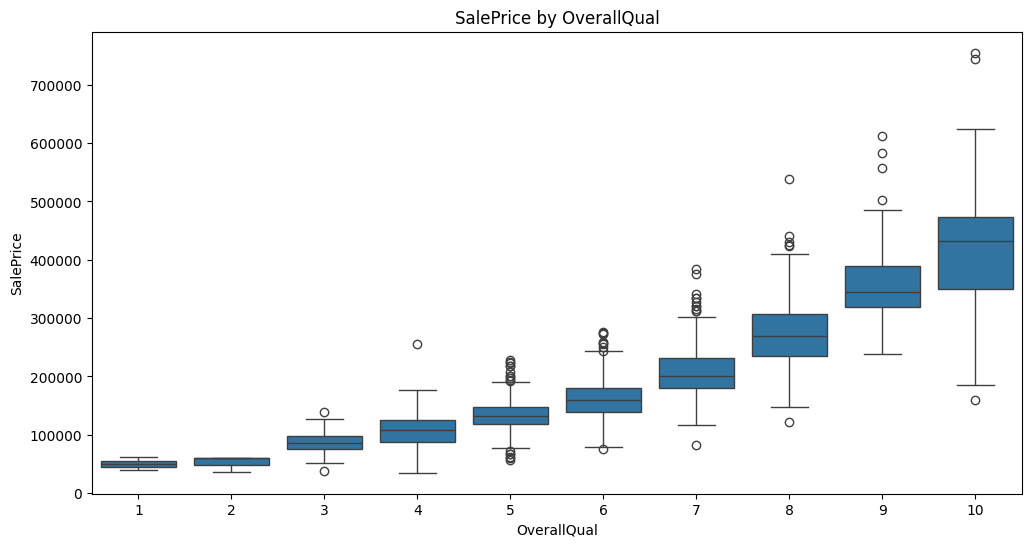

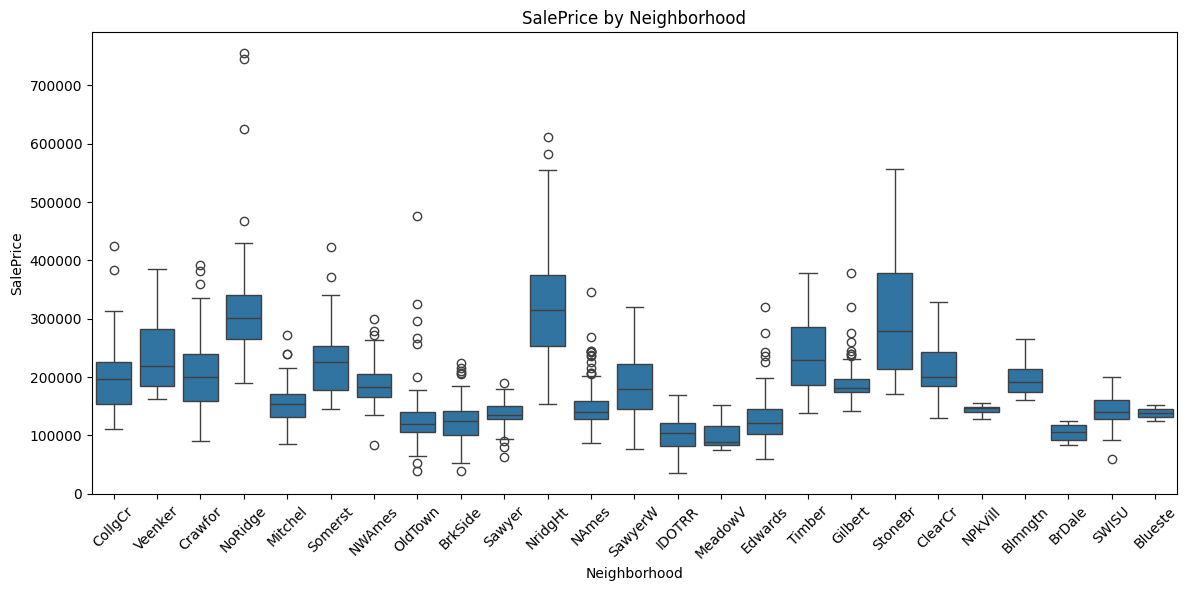

In [ ]:
# Categorical Features vs SalePrice (Boxplots)
# Top correlations with SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x="OverallQual", y="SalePrice")
plt.title("SalePrice by OverallQual")
plt.show()


plt.figure(figsize=(14, 6))
sns.boxplot(data=train_df, x="Neighborhood", y="SalePrice")
plt.xticks(rotation=45)
plt.title("SalePrice by Neighborhood")
plt.show()

The boxplot if OverallQual versus SalePrice shows a consistent upward trend. As the overall quality of the property increases, the selling price also increases.

There are also substantial differences in selling price across different neighborhoods. Specifically, NridgHt, StoneBr, and NoRidge have the highest medians. In comparison, DOTRR, MeadowV, and BrDale have the lowest medians. Evidently, location plays a major role in determining selling price.

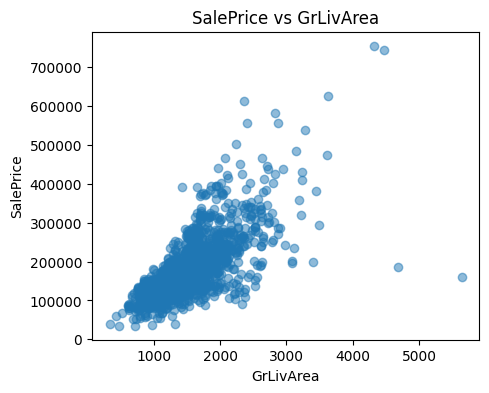

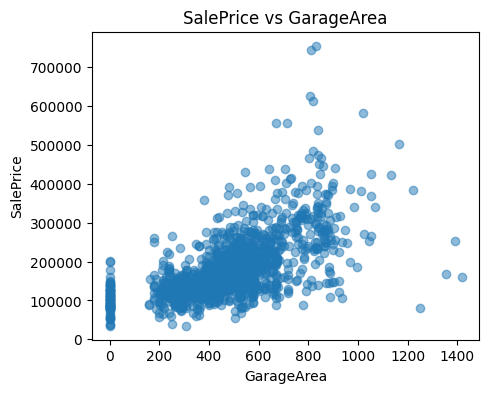

In [ ]:
# Numerical Features vs SalePrice (Scatterplots)
# Top correlations with SalePrice
features = ["GrLivArea", "GarageArea"]

for col in features:
    plt.figure(figsize=(5, 4))
    plt.scatter(train_df[col], train_df["SalePrice"], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.title(f"SalePrice vs {col}")
    plt.show()

Both GrLivArea (above-grade living area) and GarageArea (size of garage in square feet) show a positive relationship with SalePrice which intuitively makes sense. Propertues with a larger above-ground living space and garage usually tend to sell for higher prices.

## Target Variable Analysis (SalePrice)

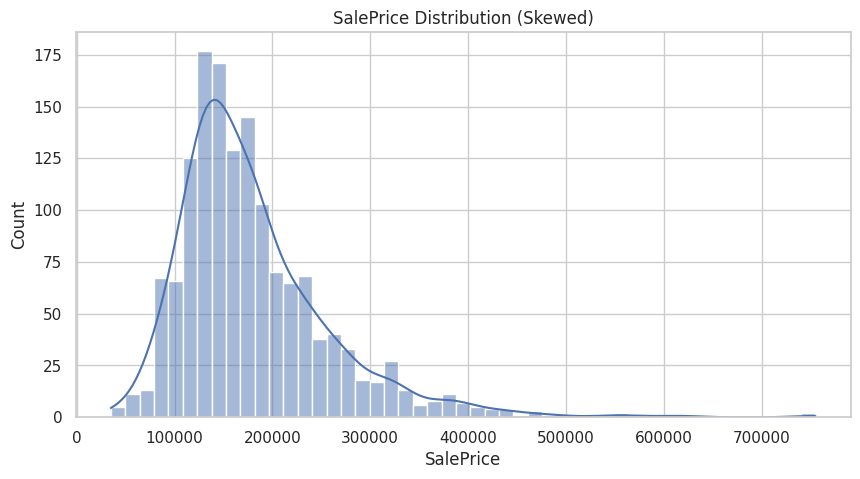

In [ ]:
# Target variable analysis: SalePrice
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("SalePrice Distribution (Skewed)")
plt.show()

The distribution is right-skewed, which may affect models that assume normality. A transformation is useful.

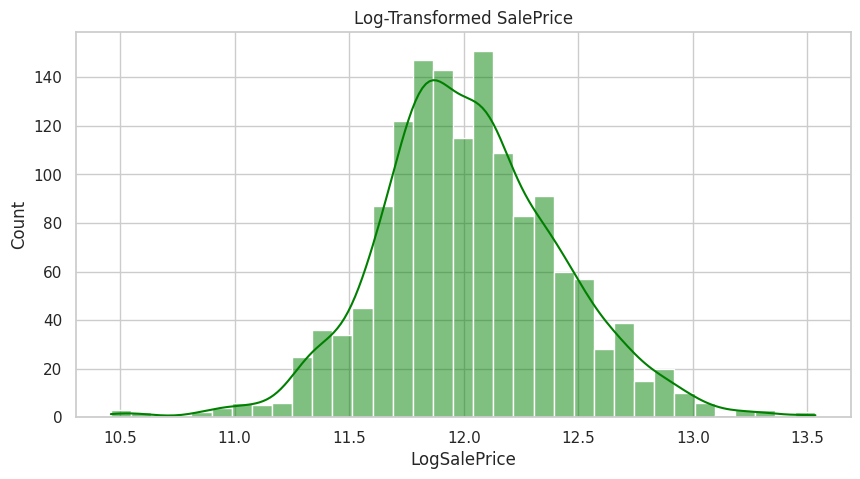

In [ ]:
# Log-transform target
train_df["LogSalePrice"] = np.log1p(train_df["SalePrice"])
sns.histplot(train_df['LogSalePrice'], kde=True, color="green")
plt.title("Log-Transformed SalePrice")
plt.show()


After log transformation, the distribution of SalePrice is more symmetrical and closer to normal.

## Outlier Analysis

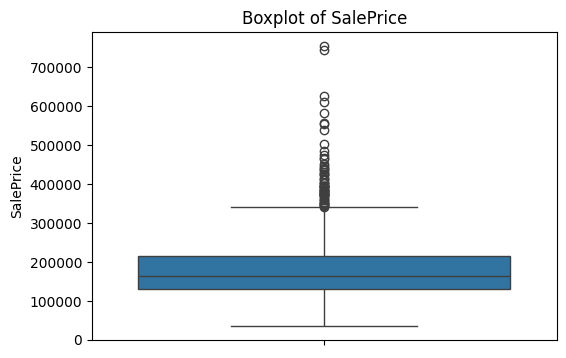

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(y=train_df["SalePrice"])
plt.title("Boxplot of SalePrice")
plt.ylabel("SalePrice")
plt.show()

A few extremely high values exist for saleprice in the dataset which are above the upper whisker in the boxplot. These data points represent expensive homes.